## Chapter 7 - Problem 7
***

**7.** The Wage data set contains a number of other features not explored
in this chapter, such as marital status (*maritl*), job class (*jobclass*),
and others. Explore the relationships between some of these other
predictors and wage, and use non-linear fitting techniques in order to
fit flexible models to the data. Create plots of the results obtained,
and write a summary of your findings.

In [6]:
library(ISLR)
summary(Wage)

      year           age                     maritl           race     
 Min.   :2003   Min.   :18.00   1. Never Married: 648   1. White:2480  
 1st Qu.:2004   1st Qu.:33.75   2. Married      :2074   2. Black: 293  
 Median :2006   Median :42.00   3. Widowed      :  19   3. Asian: 190  
 Mean   :2006   Mean   :42.41   4. Divorced     : 204   4. Other:  37  
 3rd Qu.:2008   3rd Qu.:51.00   5. Separated    :  55                  
 Max.   :2009   Max.   :80.00                                          
                                                                       
              education                     region               jobclass   
 1. < HS Grad      :268   2. Middle Atlantic   :3000   1. Industrial :1544  
 2. HS Grad        :971   1. New England       :   0   2. Information:1456  
 3. Some College   :650   3. East North Central:   0                        
 4. College Grad   :685   4. West North Central:   0                        
 5. Advanced Degree:426   5. South Atla

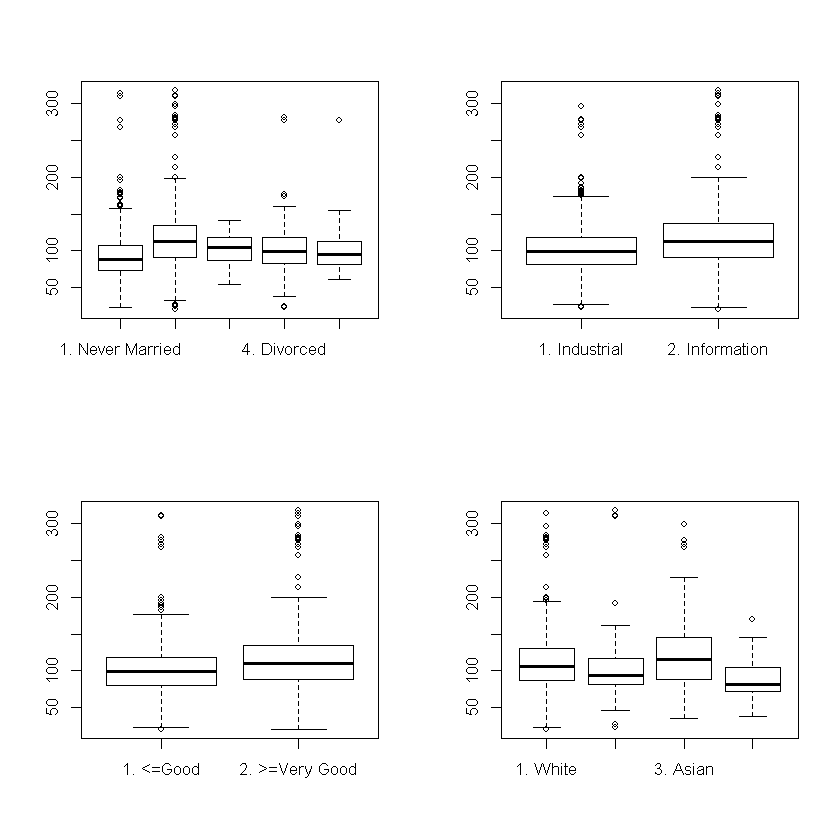

In [11]:
par(mfrow = c(2,2))
plot(Wage$maritl,Wage$wage)
plot(Wage$jobclass,Wage$wage)
plot(Wage$health,Wage$wage)
plot(Wage$race,Wage$wage)

In average: <br>
1. Married couples earn more money than any other. <br> 
2. People in the information sector win more money than in the industrial sector. <br>
3. Healthy people win more money <br>
4. Asian people win more money. <br>

**Note:** The dataset is skewed towards white, married people from the Middle Atlantic region

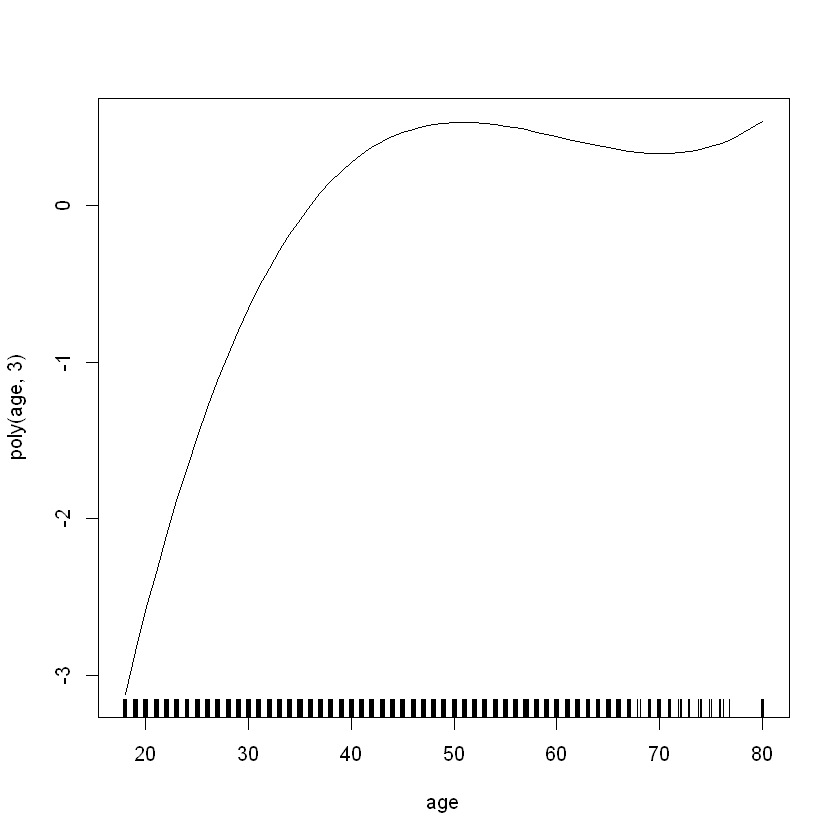

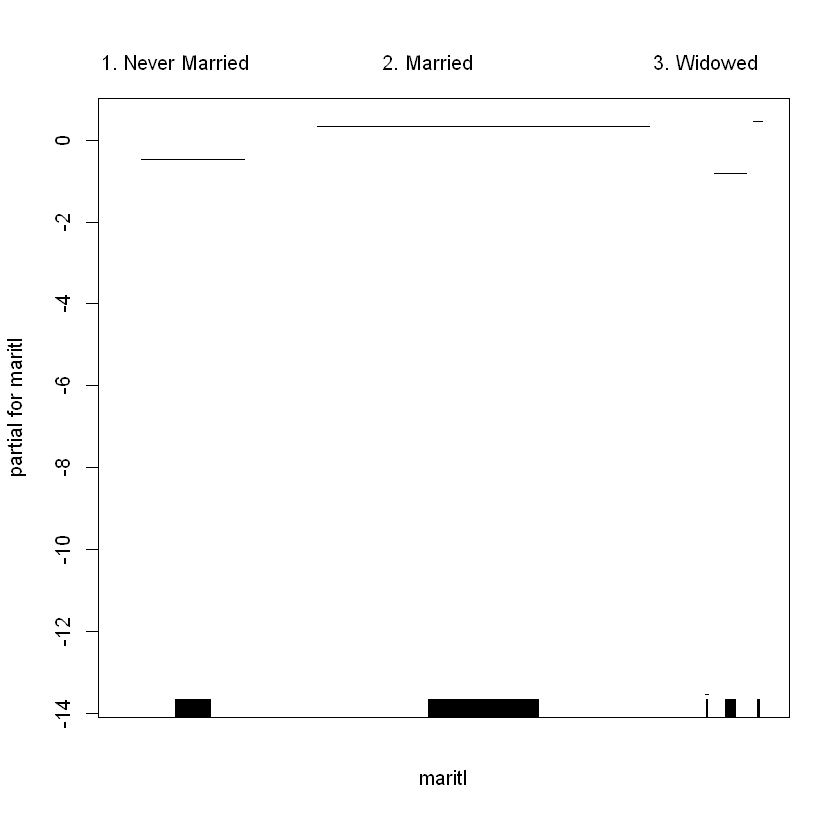

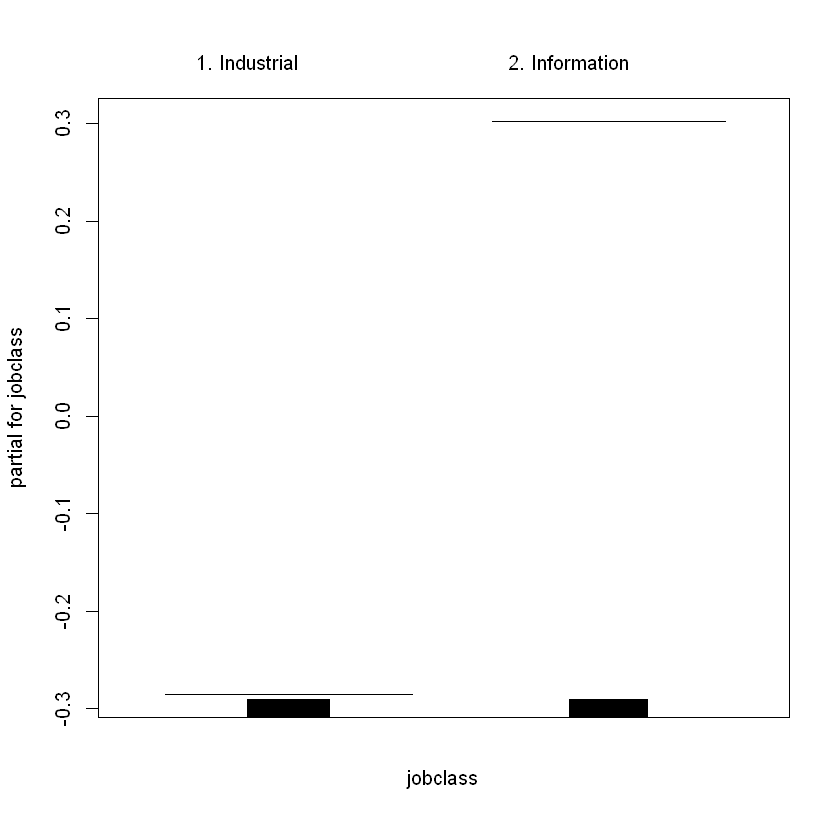

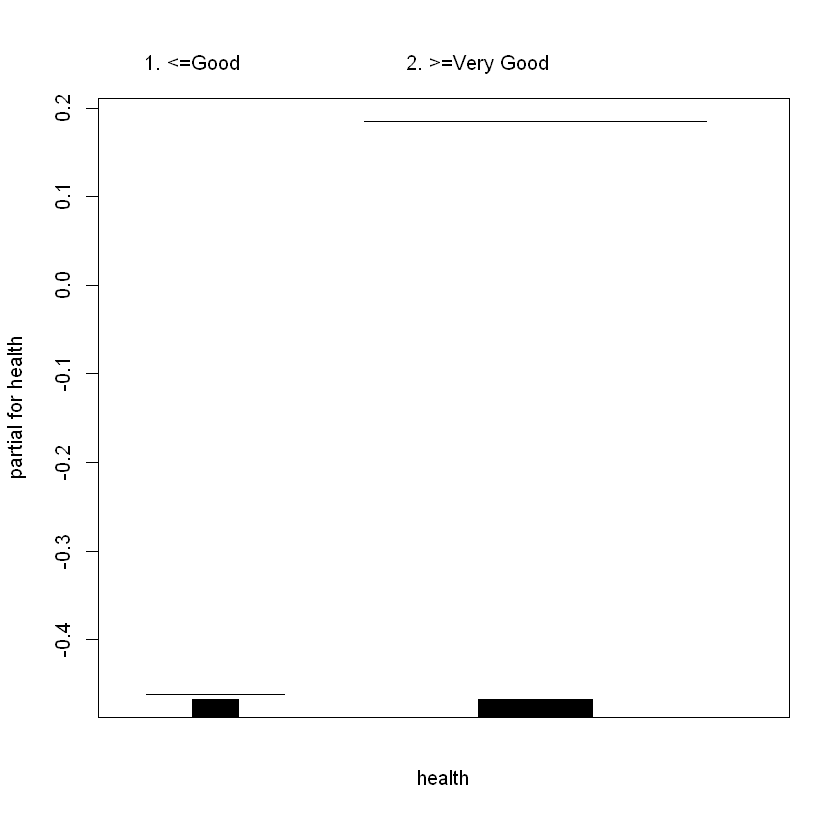

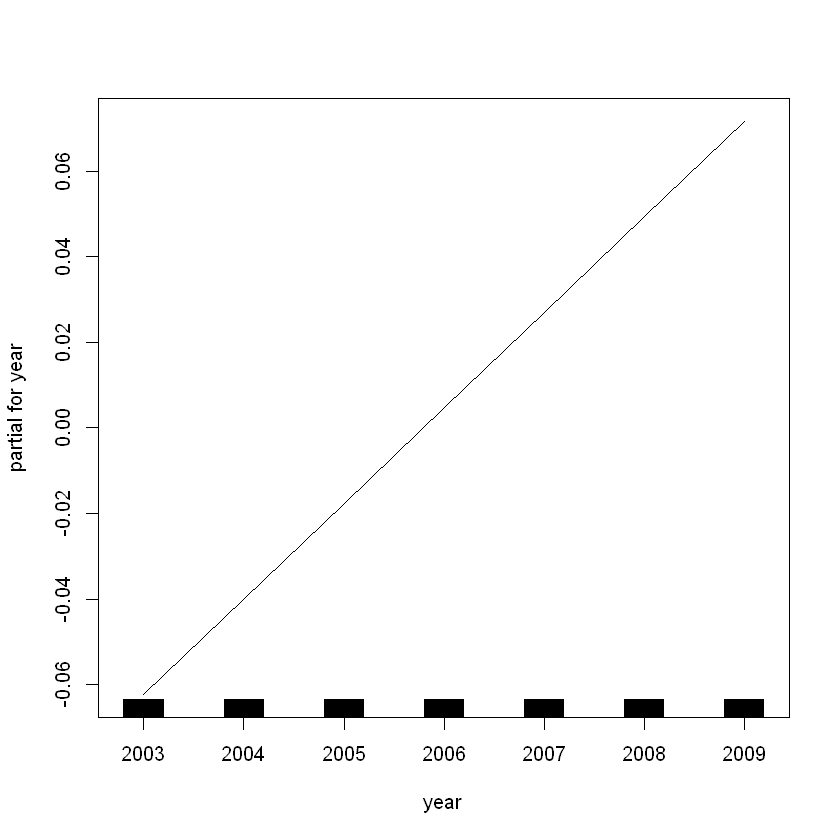

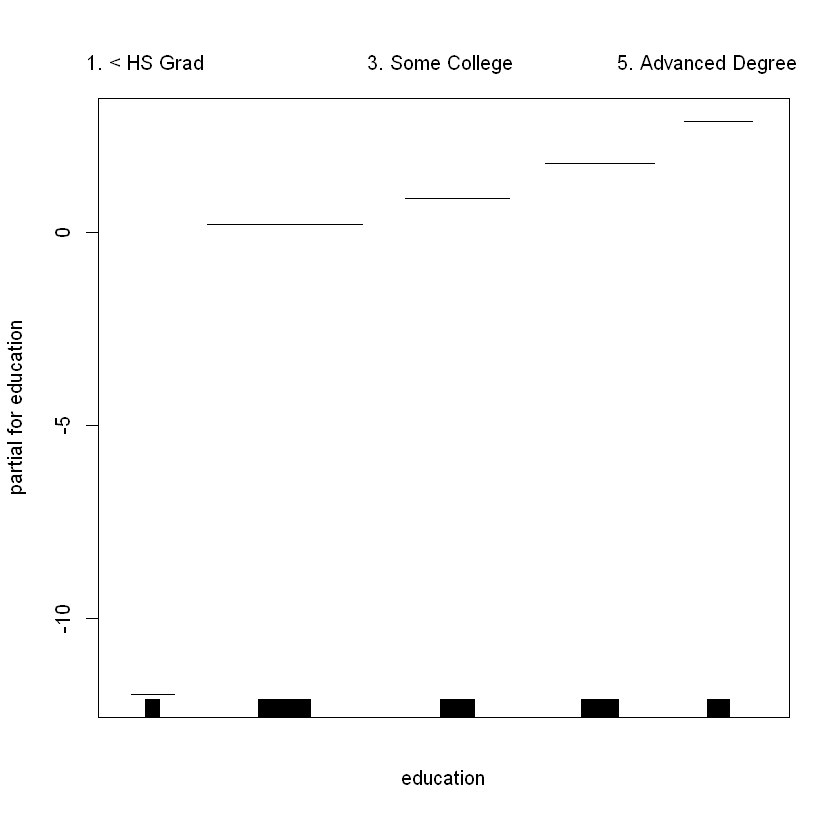

In [39]:
library(gam)
gam.model <- gam(wage ~ poly(age,3)+maritl+jobclass+health+year+education, data = Wage,family = "binomial")
plot(gam.model)

In [45]:
modelA.fit <- gam(wage ~ poly(age,3)+education, data = Wage)
modelB.fit <- gam(wage ~ poly(age,3)+education+maritl, data = Wage)
modelC.fit <- gam(wage ~ poly(age,3)+education+maritl+jobclass, data = Wage)
modelD.fit <- gam(wage ~ poly(age,3)+education+maritl+jobclass+health, data = Wage)
modelE.fit <- gam(wage ~ poly(age,3)+education+maritl+jobclass+health+race, data = Wage)

anova(modelA.fit,modelB.fit,modelC.fit,modelD.fit,modelE.fit,test = "Chisq")

Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
2992,3719809,NA,NA,NA
2988,3625481,4,94327.303,3.160222e-16
2987,3611550,1,13931.139,6.473083e-04
2986,3580867,1,30682.981,4.145776e-07
2983,3571763,3,9104.563,5.495092e-02


Dropping race as explanatory variables for wages

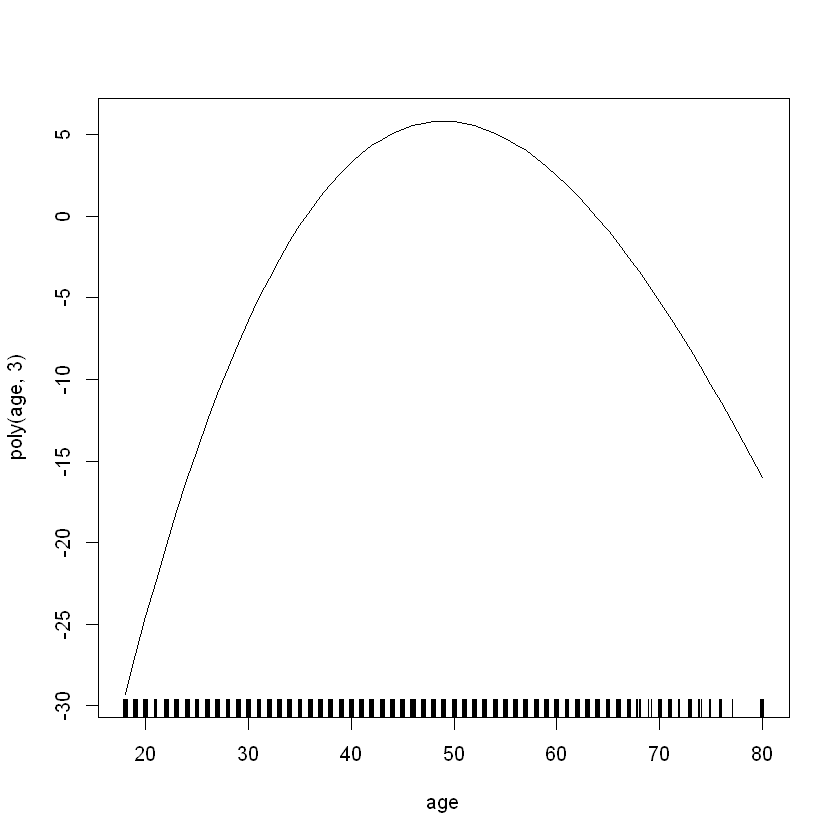

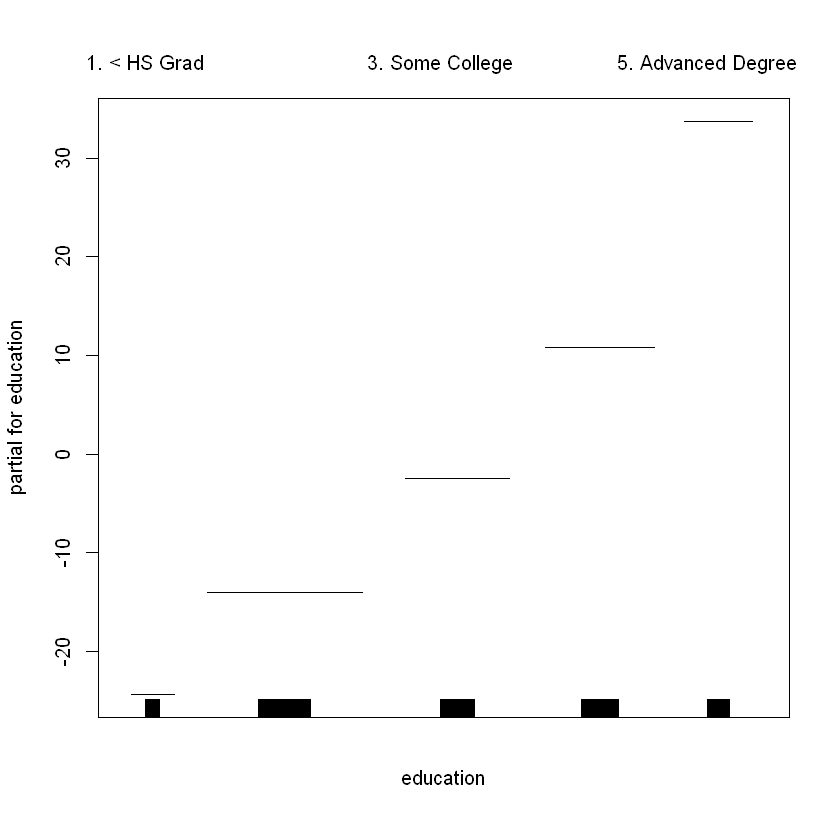

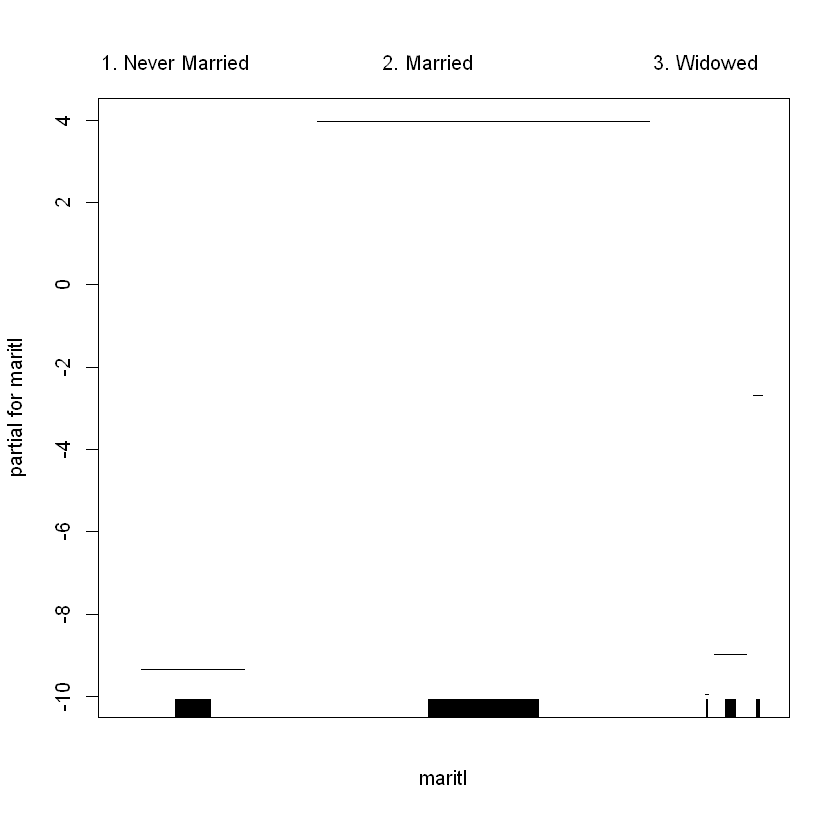

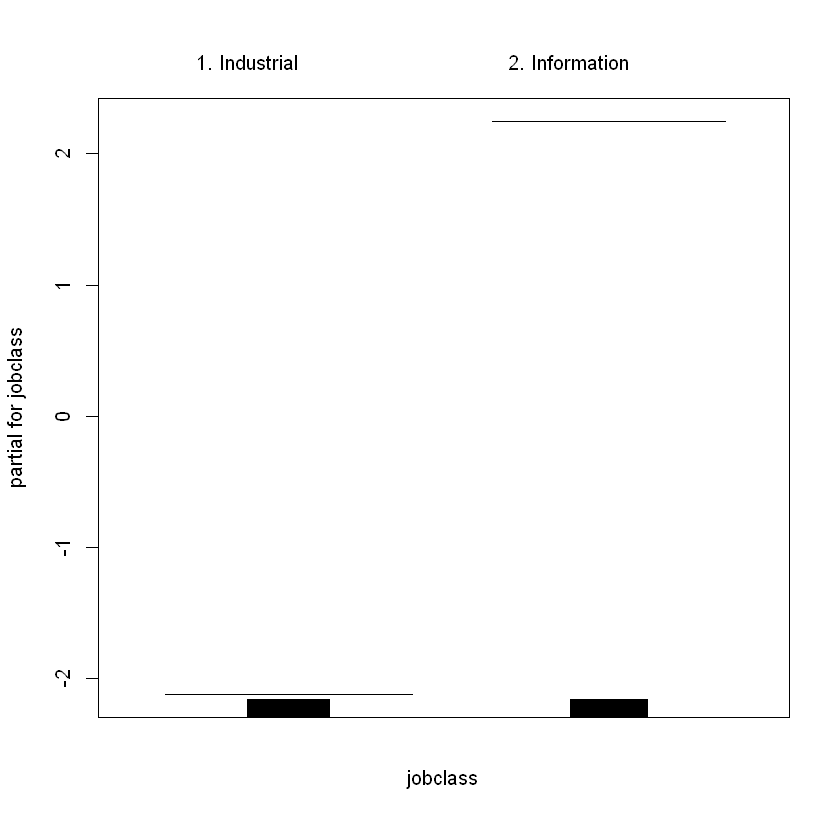

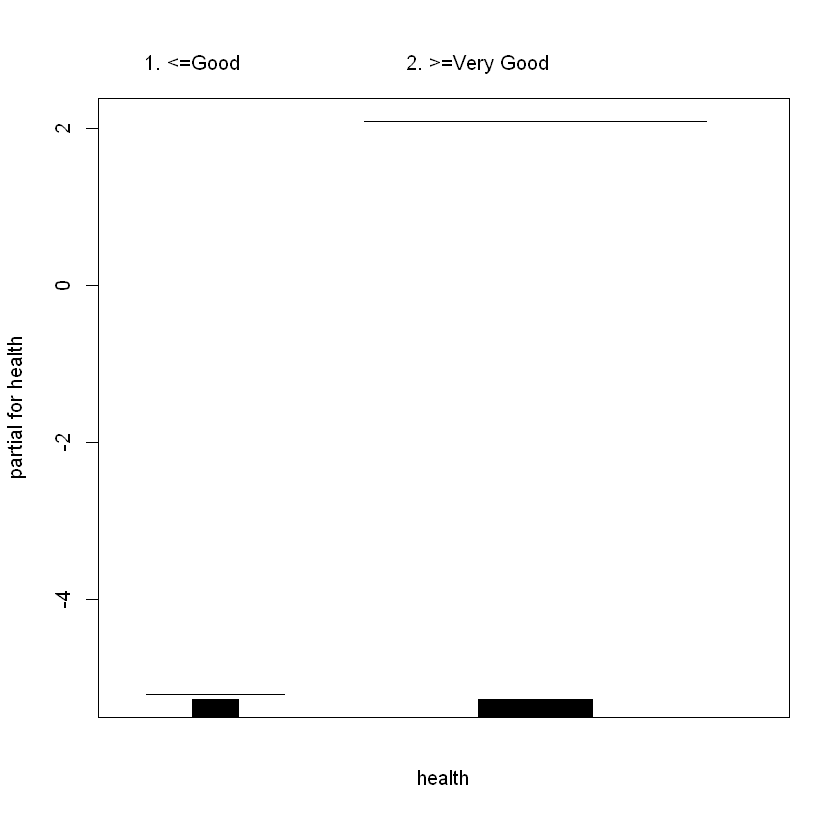

In [46]:
plot(modelD.fit)

The age, education, marital status,health and job class are significant predictors of the wage. <br>
It has been confirmed that healthy, married people working on the information sector and with higher education tend to have higher salaries.